terminal or anaconda prompt -> pip install xlrd

hoặc chạy trực tiếp => !pip install xlrd

====================================================================================================================

In [22]:
import pandas as pd

df = pd.read_excel("03_FRESH15.xls")
print(df.head())

  SEX  WTSEP  WTAPR  BMISP  BMIAP
0   M     72     59  22.02  18.14
1   M     97     86  19.70  17.44
2   M     74     69  24.09  22.43
3   M     93     88  26.97  25.57
4   F     68     64  21.51  20.10


In [23]:
df.describe()        # Thống kê cơ bản: mean, std, min, max...
df.mean(numeric_only=True)   # Trung bình các cột số
df.median(numeric_only=True) # Trung vị

WTSEP    64.00
WTAPR    66.00
BMISP    21.73
BMIAP    22.31
dtype: float64

In [24]:
df["SEX_num"] = df["SEX"].map({"M": 1, "F": 0})
df["SEX_num"].mean()


np.float64(0.47761194029850745)

~ 48% là Nam

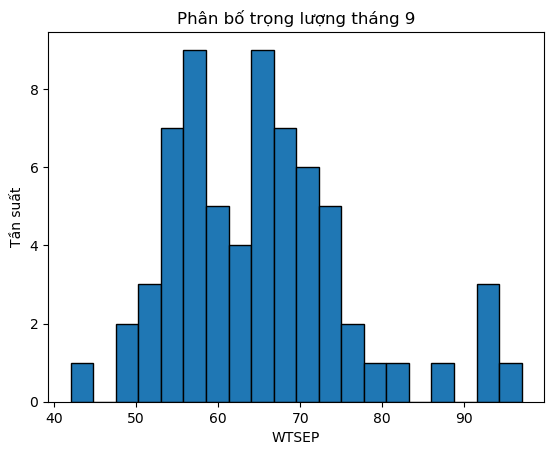

In [34]:
#Vẽ biểu đồ
import matplotlib.pyplot as plt

plt.hist(df["WTSEP"], bins=20, edgecolor ='black')   # histogram
plt.title("Phân bố trọng lượng tháng 9")
plt.xlabel("WTSEP"); plt.ylabel("Tần suất")
plt.show()


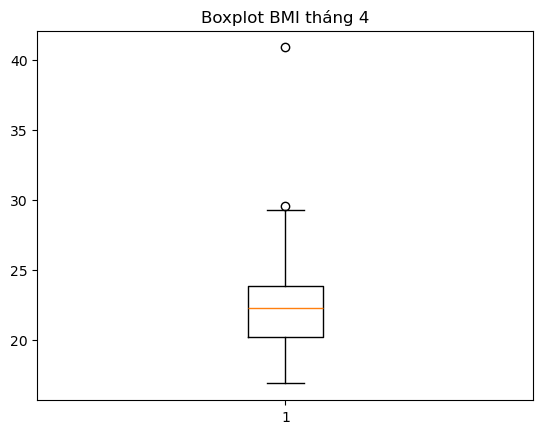

In [28]:
plt.boxplot(df["BMIAP"])  # xem ngoại lệ
plt.title("Boxplot BMI tháng 4")
plt.show()


In [29]:
#Phần 2: xác suát cơ bản 
from scipy.stats import binom, poisson, norm

In [31]:
#Dùng khi có n phép thử độc lập (ví dụ: 10 lần tung đồng xu, xác suất ngửa là 0.5).
n, p = 10, 0.5
k = 3
P = binom.pmf(k, n, p)  # Xác suất đúng 3 lần ngửa
print(P)


0.11718750000000004


In [32]:
#Phân phối Poisson
#Dùng khi đếm số sự kiện hiếm xảy ra (ví dụ: số xe qua ngã tư mỗi phút).
lam = 6   # trung bình 6 xe/phút
P = poisson.pmf(2, lam)  # Xác suất có đúng 2 xe
print(P)


0.04461753917999444


In [33]:
#Phân phối Chuẩn (Normal)

#Dùng cho dữ liệu liên tục (như chiều cao, cân nặng, điểm thi).

mu, sigma = 170, 6
P = norm.cdf(175, mu, sigma)  # Xác suất người cao ≤175cm
print(P)

0.7976716190363569


====================================================================================================================

In [1]:
import pandas as pd

# Đọc file Excel
df = pd.read_excel("03_FRESH15.xls")

# Xem 5 dòng đầu tiên
print(df.head())

# Thông tin về kiểu dữ liệu và số lượng giá trị không null
print(df.info())

# Kích thước dữ liệu (số hàng, số cột)
print("Kích thước:", df.shape)


  SEX  WTSEP  WTAPR  BMISP  BMIAP
0   M     72     59  22.02  18.14
1   M     97     86  19.70  17.44
2   M     74     69  24.09  22.43
3   M     93     88  26.97  25.57
4   F     68     64  21.51  20.10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEX     67 non-null     object 
 1   WTSEP   67 non-null     int64  
 2   WTAPR   67 non-null     int64  
 3   BMISP   67 non-null     float64
 4   BMIAP   67 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.7+ KB
None
Kích thước: (67, 5)


Kích thước dữ liệu: (67, 5)

Các cột:
 Index(['SEX', 'WTSEP', 'WTAPR', 'BMISP', 'BMIAP'], dtype='object')

Kiểu dữ liệu:
 SEX       object
WTSEP      int64
WTAPR      int64
BMISP    float64
BMIAP    float64
dtype: object

5 dòng đầu tiên:
   SEX  WTSEP  WTAPR  BMISP  BMIAP
0   M     72     59  22.02  18.14
1   M     97     86  19.70  17.44
2   M     74     69  24.09  22.43
3   M     93     88  26.97  25.57
4   F     68     64  21.51  20.10

Số lượng giá trị thiếu mỗi cột:
 SEX      0
WTSEP    0
WTAPR    0
BMISP    0
BMIAP    0
dtype: int64

Các cột số:
 ['WTSEP', 'WTAPR', 'BMISP', 'BMIAP']

--- MÔ TẢ THỐNG KÊ ---
           WTSEP       WTAPR      BMISP      BMIAP
count  67.000000   67.000000  67.000000  67.000000
mean   65.059701   66.238806  22.030000  22.484179
std    11.285390   11.284327   3.308901   3.602527
min    42.000000   47.000000  15.080000  16.890000
25%    56.500000   58.000000  19.965000  20.230000
50%    64.000000   66.000000  21.730000  22.310000
75%    70.500000   70.

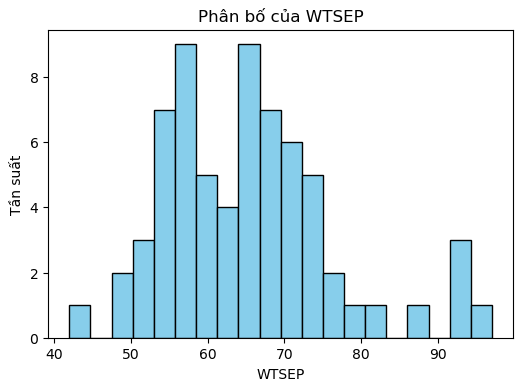

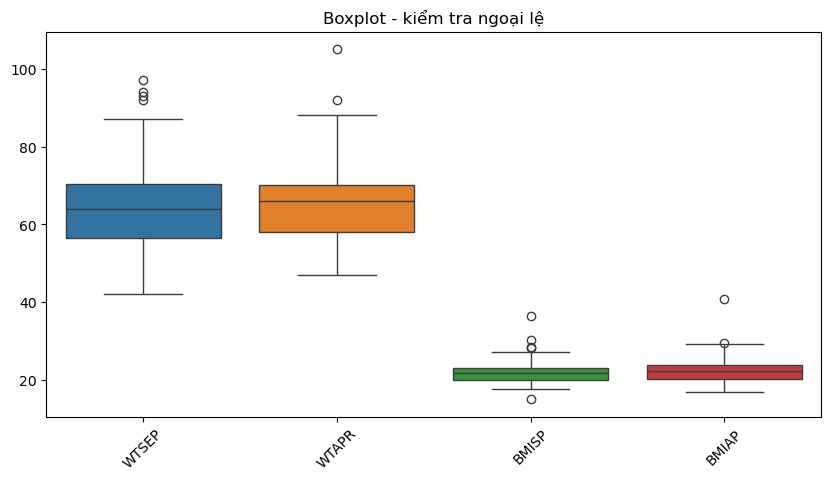

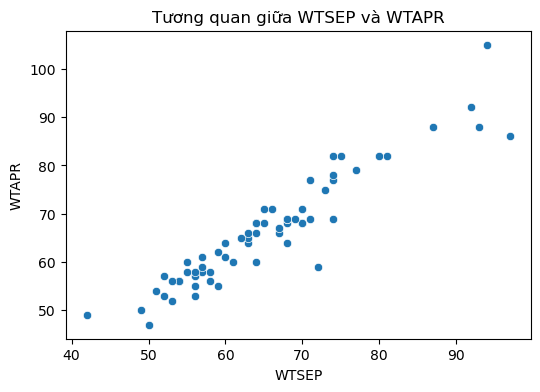

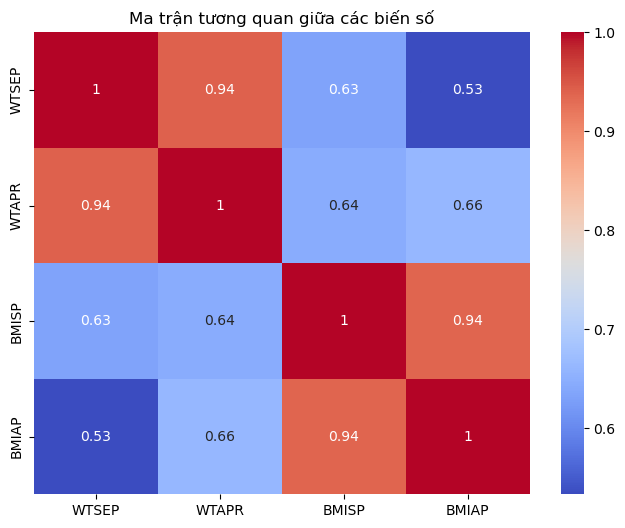


PHÂN PHỐI XÁC SUẤT

[Binomial] P(X=3)=0.2668, P(X≤3)=0.6496
[Poisson] P(X=2)=0.0842, P(X≤2)=0.1247
[Normal] P(X≤175)=0.7977, Phân vị 95%=179.87


In [4]:
# =========================================
# 1. ĐỌC DỮ LIỆU
# =========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, poisson, norm

# Đọc file Excel (.xls) - nhớ đã cài `xlrd`
df = pd.read_excel("03_FRESH15.xls")

# Thông tin tổng quát
print("Kích thước dữ liệu:", df.shape)
print("\nCác cột:\n", df.columns)
print("\nKiểu dữ liệu:\n", df.dtypes)
print("\n5 dòng đầu tiên:\n", df.head())

# =========================================
# 2. KIỂM TRA VÀ LÀM SẠCH DỮ LIỆU
# =========================================
print("\nSố lượng giá trị thiếu mỗi cột:\n", df.isna().sum())

# Xóa hàng toàn NaN (nếu có)
df = df.dropna(how='all')

# Chỉ lấy cột số để phân tích thống kê
num = df.select_dtypes(include='number')
print("\nCác cột số:\n", num.columns.tolist())

# =========================================
# 3. TÍNH ĐẶC TRƯNG THỐNG KÊ
# =========================================
print("\n--- MÔ TẢ THỐNG KÊ ---")
print(num.describe())

print("\nTrung bình mỗi biến:\n", num.mean())
print("\nTrung vị mỗi biến:\n", num.median())
print("\nĐộ lệch chuẩn:\n", num.std())

# Nếu có cột chữ, xem tần suất
cat = df.select_dtypes(include='object')
if not cat.empty:
    for c in cat.columns:
        print(f"\nGiá trị phổ biến trong {c}:\n", cat[c].value_counts().head(5))

# =========================================
# 4. TRỰC QUAN HÓA DỮ LIỆU
# =========================================

# Histogram cho 1 biến (ví dụ: Fresh)
col = num.columns[0]
plt.figure(figsize=(6,4))
plt.hist(num[col].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f"Phân bố của {col}")
plt.xlabel(col)
plt.ylabel("Tần suất")
plt.show()

# Boxplot cho toàn bộ cột số
plt.figure(figsize=(10,5))
sns.boxplot(data=num)
plt.title("Boxplot - kiểm tra ngoại lệ")
plt.xticks(rotation=45)
plt.show()

# Scatterplot ví dụ giữa 2 biến
if len(num.columns) >= 2:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=num.columns[0], y=num.columns[1], data=num)
    plt.title(f"Tương quan giữa {num.columns[0]} và {num.columns[1]}")
    plt.show()

# Heatmap tương quan
plt.figure(figsize=(8,6))
sns.heatmap(num.corr(), annot=True, cmap="coolwarm")
plt.title("Ma trận tương quan giữa các biến số")
plt.show()

# =========================================
# 5. TÍNH XÁC SUẤT & PHÂN PHỐI
# =========================================

print("\n=======================")
print("PHÂN PHỐI XÁC SUẤT")
print("=======================")

# --- Phân phối Nhị thức ---
# Giả sử: 10 phép thử, p=0.3 (xác suất thành công)
n, p = 10, 0.3
k = 3
P_binom = binom.pmf(k, n, p)
F_binom = binom.cdf(k, n, p)
print(f"\n[Binomial] P(X=3)={P_binom:.4f}, P(X≤3)={F_binom:.4f}")

# --- Phân phối Poisson ---
# Giả sử: trung bình λ = 5
lam = 5
P_pois = poisson.pmf(2, lam)
F_pois = poisson.cdf(2, lam)
print(f"[Poisson] P(X=2)={P_pois:.4f}, P(X≤2)={F_pois:.4f}")

# --- Phân phối Chuẩn ---
# Giả sử: Chiều cao ~ N(170, 6²)
mu, sigma = 170, 6
P_norm = norm.cdf(175, mu, sigma)
x95 = norm.ppf(0.95, mu, sigma)
print(f"[Normal] P(X≤175)={P_norm:.4f}, Phân vị 95%={x95:.2f}")


In [7]:
#1
print(f"1) \nKiểu dữ liệu:\n", df.dtypes)


1) 
Kiểu dữ liệu:
 SEX       object
WTSEP      int64
WTAPR      int64
BMISP    float64
BMIAP    float64
dtype: object


In [8]:
num_cols = df.select_dtypes(include='number').columns
obj_cols = df.select_dtypes(include='object').columns

print(f"2) Cột số:", num_cols.tolist())
print(f"2.1) Cột chữ:", obj_cols.tolist())


2) Cột số: ['WTSEP', 'WTAPR', 'BMISP', 'BMIAP']
2.1) Cột chữ: ['SEX']


In [9]:
if 'GioiTinh' in df.columns:
    df['GioiTinh_num'] = df['GioiTinh'].map({'Nam': 1, 'Nữ': 0})

In [10]:
for c in obj_cols:
    df[c + '_num'] = (
        df[c].astype(str)
              .str.replace(',', '', regex=False)
              .str.replace('%', '', regex=False)
              .str.replace(r'[^\d\.\-]', '', regex=True)
              .str.strip()
              .pipe(pd.to_numeric, errors='coerce')
    )


In [11]:
text_only = []
for c in obj_cols:
    if df[c].nunique() > df.shape[0] / 2:   # Quá nhiều giá trị duy nhất -> có vẻ là ID
        text_only.append(c)
print("Các cột chỉ mang tính định danh (bỏ qua):", text_only)


Các cột chỉ mang tính định danh (bỏ qua): []


In [12]:
all_numeric = df.select_dtypes(include='number')
print(f"4) Các cột có thể tính trung bình:", all_numeric.columns.tolist())


4) Các cột có thể tính trung bình: ['WTSEP', 'WTAPR', 'BMISP', 'BMIAP', 'SEX_num']


In [13]:
mean_values = all_numeric.mean()
print(f"5) \n--- TRUNG BÌNH CÁC CỘT SỐ ---")
print(mean_values)


5) 
--- TRUNG BÌNH CÁC CỘT SỐ ---
WTSEP      65.059701
WTAPR      66.238806
BMISP      22.030000
BMIAP      22.484179
SEX_num          NaN
dtype: float64


In [14]:
def safe_mean(df):
    result = {}
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            result[col] = df[col].mean()
        else:
            num = pd.to_numeric(df[col], errors='coerce')
            if num.notna().any():
                result[col] = num.mean()
            else:
                result[col] = "Không tính được (chuỗi danh mục)"
    return pd.Series(result)

print(safe_mean(df))


SEX        Không tính được (chuỗi danh mục)
WTSEP                             65.059701
WTAPR                             66.238806
BMISP                                 22.03
BMIAP                             22.484179
SEX_num                                 NaN
dtype: object


In [15]:
print(df["SEX"].unique())


['M' 'F']


In [16]:
df["SEX"] = df["SEX"].astype(str).str.strip().str.upper()
print(df["SEX"].unique())


['M' 'F']


In [17]:
df["SEX_num"] = df["SEX"].map({"M": 1, "F": 0})


In [18]:
df["SEX_num"] = df["SEX"].map({"MALE": 1, "FEMALE": 0, "M": 1, "F": 0})
#Nếu dữ liệu là "MALE" và "FEMALE":

In [19]:
print(df[["SEX", "SEX_num"]].head(10))
print("Trung bình giới tính:", df["SEX_num"].mean())


  SEX  SEX_num
0   M        1
1   M        1
2   M        1
3   M        1
4   F        0
5   M        1
6   F        0
7   F        0
8   F        0
9   F        0
Trung bình giới tính: 0.47761194029850745


In [20]:
num = df.select_dtypes(include='number')
print(num.mean())


WTSEP      65.059701
WTAPR      66.238806
BMISP      22.030000
BMIAP      22.484179
SEX_num     0.477612
dtype: float64


Kích thước: (67, 5)

Các cột: ['SEX', 'WTSEP', 'WTAPR', 'BMISP', 'BMIAP']

Dtypes:
 SEX       object
WTSEP      int64
WTAPR      int64
BMISP    float64
BMIAP    float64
dtype: object

5 dòng đầu:
   SEX  WTSEP  WTAPR  BMISP  BMIAP
0   M     72     59  22.02  18.14
1   M     97     86  19.70  17.44
2   M     74     69  24.09  22.43
3   M     93     88  26.97  25.57
4   F     68     64  21.51  20.10

=== MÔ TẢ THỐNG KÊ (cột số) ===
           WTSEP       WTAPR      BMISP      BMIAP    SEX_num
count  67.000000   67.000000  67.000000  67.000000  67.000000
mean   65.059701   66.238806  22.030000  22.484179   0.477612
std    11.285390   11.284327   3.308901   3.602527   0.503268
min    42.000000   47.000000  15.080000  16.890000   0.000000
25%    56.500000   58.000000  19.965000  20.230000   0.000000
50%    64.000000   66.000000  21.730000  22.310000   0.000000
75%    70.500000   70.000000  23.160000  23.860000   1.000000
max    97.000000  105.000000  36.570000  40.860000   1.000000

=== TRU

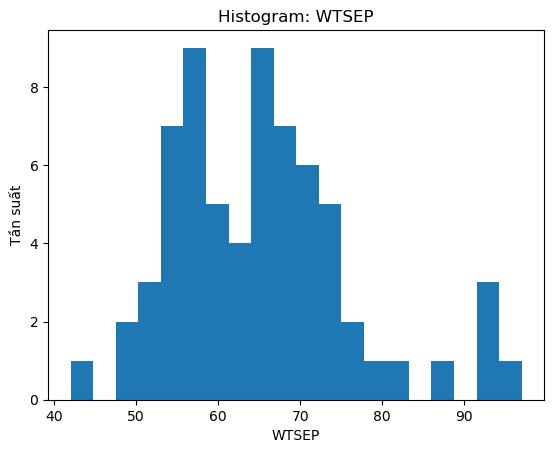

/var/folders/_l/jkzl_h7n1h9241fb7cqx7k5w0000gn/T/ipykernel_32998/2707621369.py:126: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([num[c].dropna().values for c in num.columns], vert=True, labels=num.columns)


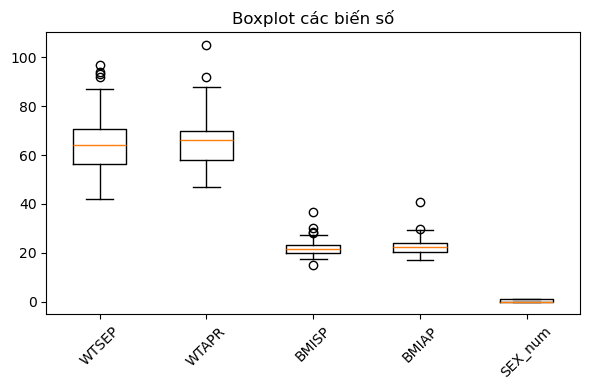

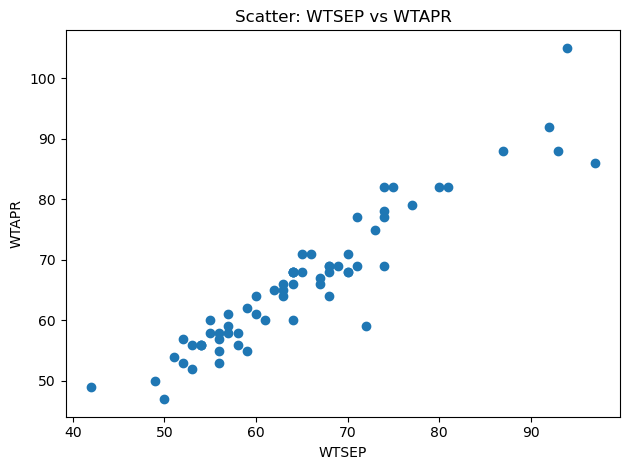

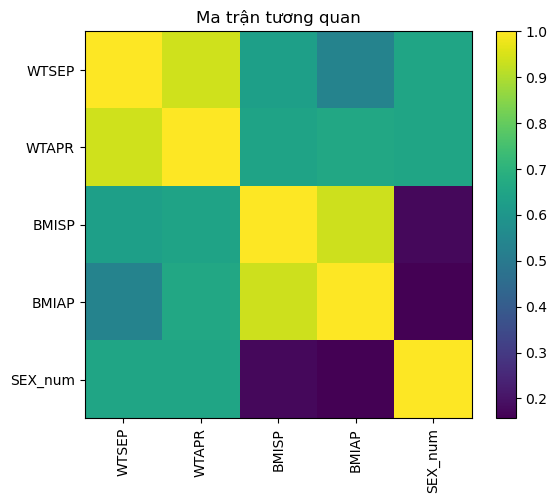

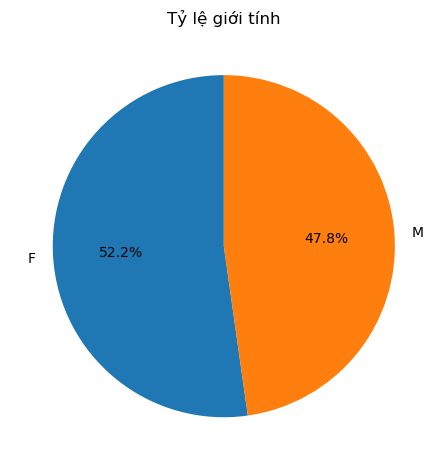


ÔN 3 PHÂN PHỐI CƠ BẢN

[Binomial] n=10, p=0.3, k=3
P(X=3) = 0.2668
P(X≤3) = 0.6496
Phân vị 90% = 5

[Poisson] λ=6, k=2
P(X=2) = 0.0446
P(X≤2) = 0.0620
Phân vị 95% = 10

[Normal] μ=170, σ=6, x=175
P(X≤175) = 0.7977
Phân vị 97.5% = 181.76

--- GỢI Ý THUYẾT MINH NỘP BÀI ---
• Đặc trưng thống kê (cột số): count, mean, std, min, 25%, 50%, 75%, max.
  - Mean(WTSEP) = 65.06
  - Mean(WTAPR) = 66.24
  - Mean(BMISP) = 22.03
  - Mean(BMIAP) = 22.48
  - Mean(SEX_num) = 0.48
• Tỷ lệ Nam ≈ 47.76%
• Đã vẽ: histogram (phân bố), boxplot (ngoại lệ), scatter (tương quan), heatmap (tương quan).
• Phân phối: Binomial (pmf/cdf/ppf), Poisson (pmf/cdf/ppf), Normal (pdf/cdf/ppf).


In [21]:
# =========================================
# SETUP
# =========================================
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, norm

FILE = "03_FRESH15.xls"   # ← đổi tên nếu bạn để chỗ khác

# ===== Helper =====
def try_read_excel_xls(path):
    """
    Đọc .xls an toàn: cố gắng dùng xlrd; nếu thiếu, in hướng dẫn cài.
    """
    try:
        import xlrd  # noqa
    except ImportError:
        msg = (
            "\n[!] Thiếu thư viện 'xlrd' để đọc .xls.\n"
            "    Cài bằng pip rồi chạy lại:\n"
            "    pip install xlrd\n"
        )
        print(msg)
        raise
    return pd.read_excel(path)

def safe_mean(df: pd.DataFrame) -> pd.Series:
    """
    Tính trung bình 'an toàn' cho mọi cột:
    - Nếu là số -> mean trực tiếp
    - Nếu là chuỗi chứa số -> ép số rồi mean
    - Nếu là chuỗi danh mục -> ghi chú
    """
    out = {}
    for col in df.columns:
        s = df[col]
        if pd.api.types.is_numeric_dtype(s):
            out[col] = s.mean()
        else:
            # Thử làm sạch chuỗi số phổ biến
            s2 = (s.astype(str)
                    .str.strip()
                    .str.replace(",", "", regex=False)
                    .str.replace("%", "", regex=False)
                    .str.replace(r"[^\d\.\-]", "", regex=True))
            num = pd.to_numeric(s2, errors="coerce")
            if num.notna().any():
                out[col] = num.mean()
            else:
                out[col] = "Không áp dụng (danh mục/ID)"
    return pd.Series(out)

# =========================================
# 1) ĐỌC DỮ LIỆU
# =========================================
try:
    df = try_read_excel_xls(FILE)
except Exception as e:
    print(f"Không đọc được file {FILE}: {e}")
    sys.exit(1)

print("Kích thước:", df.shape)
print("\nCác cột:", list(df.columns))
print("\nDtypes:\n", df.dtypes)
print("\n5 dòng đầu:\n", df.head())

# =========================================
# 2) LÀM SẠCH NHẸ
# =========================================
# Gỡ các dòng trống hoàn toàn
df = df.dropna(how="all")

# Chuẩn hóa cột SEX (nếu có)
if "SEX" in df.columns:
    # Đưa về upper + bỏ khoảng trắng
    df["SEX"] = df["SEX"].astype(str).str.strip().str.upper()
    # Map các biến thể phổ biến
    mapping = {"M": 1, "MALE": 1, "F": 0, "FEMALE": 0}
    df["SEX_num"] = df["SEX"].map(mapping)
    # Nếu vẫn còn NaN do giá trị lạ, in top giá trị để bạn kiểm
    if df["SEX_num"].isna().any():
        print("\n[CẢNH BÁO] SEX có giá trị ngoài mapping. Top giá trị:")
        print(df["SEX"].value_counts().head(10))

# =========================================
# 3) TÍNH CÁC ĐẶC TRƯNG
# =========================================
print("\n=== MÔ TẢ THỐNG KÊ (cột số) ===")
num = df.select_dtypes(include="number")
print(num.describe())

print("\n=== TRUNG BÌNH (cột số) ===")
print(num.mean())

print("\n=== TRUNG BÌNH AN TOÀN (tất cả cột) ===")
print(safe_mean(df))

# Nếu có cột chuỗi -> đếm tần suất nhanh
obj = df.select_dtypes(include="object")
if not obj.empty:
    print("\n=== TẦN SUẤT TOP 5 CHO CÁC CỘT CHUỖI ===")
    for c in obj.columns:
        vc = obj[c].value_counts(dropna=False).head(5)
        print(f"\n- {c}:\n{vc}")

# =========================================
# 4) TRỰC QUAN HÓA (Matplotlib thuần – 1 plot/lần)
#    LƯU Ý YÊU CẦU THI: không cần màu mè, tập trung ý nghĩa
# =========================================

# 4.1 Histogram cho 1 biến liên tục (chọn thông minh)
if not num.empty:
    col_hist = num.columns[0]
    plt.figure()
    plt.hist(num[col_hist].dropna(), bins=20)
    plt.title(f"Histogram: {col_hist}")
    plt.xlabel(col_hist)
    plt.ylabel("Tần suất")
    plt.show()

# 4.2 Boxplot toàn bộ cột số (để soi outlier)
if len(num.columns) >= 1:
    plt.figure(figsize=(max(6, len(num.columns)*0.8), 4))
    plt.boxplot([num[c].dropna().values for c in num.columns], vert=True, labels=num.columns)
    plt.title("Boxplot các biến số")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4.3 Scatter giữa 2 biến bất kỳ (nếu có >= 2 biến số)
if len(num.columns) >= 2:
    xcol, ycol = num.columns[0], num.columns[1]
    plt.figure()
    plt.scatter(num[xcol], num[ycol])
    plt.title(f"Scatter: {xcol} vs {ycol}")
    plt.xlabel(xcol); plt.ylabel(ycol)
    plt.tight_layout()
    plt.show()

# 4.4 Ma trận tương quan (image đơn giản)
if len(num.columns) >= 2:
    corr = num.corr(numeric_only=True)
    plt.figure(figsize=(6, 5))
    plt.imshow(corr, interpolation="nearest")
    plt.title("Ma trận tương quan")
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.colorbar()
    plt.tight_layout()
    plt.show()

# 4.5 Pie chart giới tính (nếu có SEX)
if "SEX" in df.columns:
    vc = df["SEX"].value_counts()
    plt.figure()
    plt.pie(vc.values, labels=vc.index, autopct="%1.1f%%", startangle=90)
    plt.title("Tỷ lệ giới tính")
    plt.tight_layout()
    plt.show()

# =========================================
# 5) ÔN XÁC SUẤT: Nhị thức – Poisson – Chuẩn
# =========================================

print("\n=====================")
print("ÔN 3 PHÂN PHỐI CƠ BẢN")
print("=====================")

# 5.1 Binomial: n phép thử, p xác suất thành công
n, p = 10, 0.3
k = 3
pmf_binom = binom.pmf(k, n, p)   # P(X = 3)
cdf_binom = binom.cdf(k, n, p)   # P(X <= 3)
ppf90_binom = binom.ppf(0.90, n, p)  # phân vị 90%
print(f"\n[Binomial] n={n}, p={p}, k={k}")
print(f"P(X=3) = {pmf_binom:.4f}")
print(f"P(X≤3) = {cdf_binom:.4f}")
print(f"Phân vị 90% = {ppf90_binom:.0f}")

# 5.2 Poisson: λ trung bình sự kiện/đơn vị thời gian
lam = 6
k2 = 2
pmf_pois = poisson.pmf(k2, lam)      # P(X=2)
cdf_pois = poisson.cdf(k2, lam)      # P(X<=2)
ppf95_pois = poisson.ppf(0.95, lam)  # phân vị 95%
print(f"\n[Poisson] λ={lam}, k={k2}")
print(f"P(X=2) = {pmf_pois:.4f}")
print(f"P(X≤2) = {cdf_pois:.4f}")
print(f"Phân vị 95% = {ppf95_pois:.0f}")

# 5.3 Normal: X ~ N(μ, σ²)
mu, sigma = 170, 6
x = 175
cdf_norm = norm.cdf(x, mu, sigma)    # P(X<=x)
ppf975_norm = norm.ppf(0.975, mu, sigma)  # mốc 97.5% (2-tail 95%)
print(f"\n[Normal] μ={mu}, σ={sigma}, x={x}")
print(f"P(X≤{x}) = {cdf_norm:.4f}")
print(f"Phân vị 97.5% = {ppf975_norm:.2f}")

# =========================================
# 6) GỢI Ý TRẢ LỜI THI (trình bày ngắn gọn)
# =========================================
def summarize_for_report(df):
    lines = []
    num = df.select_dtypes(include="number")
    if not num.empty:
        desc = num.describe().round(2)
        lines.append("• Đặc trưng thống kê (cột số): count, mean, std, min, 25%, 50%, 75%, max.")
        means = num.mean().round(2)
        for c, v in means.items():
            lines.append(f"  - Mean({c}) = {v}")
    if "SEX_num" in df.columns:
        sex_rate = df["SEX_num"].mean()
        if pd.notna(sex_rate):
            lines.append(f"• Tỷ lệ Nam ≈ {sex_rate*100:.2f}%")
    lines.append("• Đã vẽ: histogram (phân bố), boxplot (ngoại lệ), scatter (tương quan), heatmap (tương quan).")
    lines.append("• Phân phối: Binomial (pmf/cdf/ppf), Poisson (pmf/cdf/ppf), Normal (pdf/cdf/ppf).")
    return "\n".join(lines)

print("\n--- GỢI Ý THUYẾT MINH NỘP BÀI ---")
print(summarize_for_report(df))
